<a href="https://colab.research.google.com/github/Shashwat1001/Python/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore", category= DeprecationWarning)

In [0]:
train = pd.read_csv('/content/train_E6oV3lV.csv')
test = pd.read_csv('/content/test_tweets_anuFYb8.csv')

In [0]:
train.head(5)
test.isnull().any()
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [0]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [0]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [0]:
train.shape

(31962, 3)

In [0]:
test.shape

(17197, 2)

In [0]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

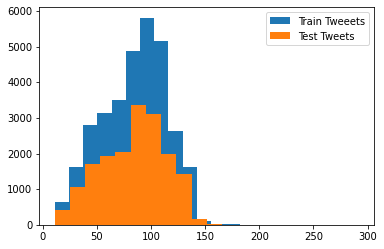

In [0]:
l_train = train['tweet'].str.len()
le_test = test['tweet'].str.len()
plt.hist(l_train, bins=20, label='Train Tweeets')
plt.hist(le_test, bins=20, label='Test Tweets')
plt.legend()
plt.show()

In [0]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [0]:
#combi['label'] = combi.groupby('tweet')['label'].ffill()
#combi=combi.dropna()
#combi = combi.reset_index(drop =True)

In [0]:
def remove_pattern(input_txt,pattern):
    r= re.findall(pattern, input_txt)
    for i in r:
        input_txt=re.sub(i, '', input_txt)
    return input_txt

In [0]:
combi['tidy_tweet']= combi['tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,user camping tomorrow user user user user user user user danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here i m it s so #gr


In [0]:
combi['tidy_tweet1']=np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*" )
combi.head(5)

,id,label,tweet,tidy_tweet,tidy_tweet1
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,factsguide: society now #motivation


In [0]:
combi['tidy_tweet1']= combi['tidy_tweet1'].str.replace("[^a-zA-Z#]"," ")
combi.head(10)

,id,label,tweet,tidy_tweet,tidy_tweet1
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,user camping tomorrow user user user user user user user danny,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here i m it s so #gr,welcome here i m it s so #gr


In [0]:
combi['tidy_tweet1']= combi['tidy_tweet1'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head(10)

,id,label,tweet,tidy_tweet,tidy_tweet1
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,user camping tomorrow user user user user user user user danny,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,user user welcome here i m it s so #gr,welcome here


In [0]:
token_tweet= combi['tidy_tweet1'].apply(lambda x: x.split())
token_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet1, dtype: object

In [0]:
from nltk.stem.porter import *
stemmer= PorterStemmer()
token_tweet = token_tweet.apply (lambda x: [stemmer.stem(i) for i in x])

In [0]:
for i in range (len(token_tweet)):
    token_tweet[i]= ' '.join(token_tweet[i])
combi['tidy_tweet1']= token_tweet

In [0]:
combi.tail(1000)

,id,label,tweet,tidy_tweet,tidy_tweet1
48159,48160,NaN,"@user i really hate that pll is coming back on the day i get my wisdom teeth out. i won't be able to enjoy it good, but still #eâ¦",user i really hate that pll is coming back on the day i get my wisdom teeth out i won t be able to enjoy it good but still #e,realli hate that come back wisdom teeth abl enjoy good still
48160,48161,NaN,i smell a blowout. #cavs coming out sloppy and uninspired. #nbafinals,i smell a blowout #cavs coming out sloppy and uninspired #nbafinals,smell blowout #cav come sloppi uninspir #nbafin
48161,48162,NaN,@user #girliguessimwithdeath lets get this trending,user #girliguessimwithdeath lets get this trending,#girliguessimwithdeath let thi trend
48162,48163,NaN,needless to say it was a muddy one tonight!! #friends #girls #giggin #pinkafros #muddyâ¦,needless to say it was a muddy one tonight #friends #girls #giggin #pinkafros #muddy,needless muddi tonight #friend #girl #giggin #pinkafro #muddi
48163,48164,NaN,#late #ff to my #gamedev #indiedev #indiegamedev #squad! @user @user @user @user,#late #ff to my #gamedev #indiedev #indiegamedev #squad user user user user,#late #gamedev #indiedev #indiegamedev #squad
...,...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation #trump #uselections #leadership #politics #brexit #blm gt,thought factori left right polaris #trump #uselect #leadership #polit #brexit #blm
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like a mermaid #hairflip #neverready #formal #wedding #gown #dresses #mermaid,feel like mermaid #hairflip #neverreadi #formal #wed #gown #dress #mermaid
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",#hillary #campaigned today in #ohio omg amp used words like assets amp liability never once did #clinton say thee word #radicalization,#hillari #campaign today #ohio use word like asset liabil never onc #clinton thee word #radic
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy at work conference right mindset leads to culture of development organizations #work #mindset,happi work confer right mindset lead cultur develop organ #work #mindset


In [0]:
#all_word= ' '.join([text for text in combi['tidy_tweet1']]) 
#import WordCloud 
#wordcloud= WordCloud(width=800, height=500, rando_state=21, max_font_size= 110).generate(all_word)

In [0]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags
HT_regular= hashtag_extract(combi['tidy_tweet1'][combi['label']==0])
HT_negative= hashtag_extract(combi['tidy_tweet1'][combi['label']==1])
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative,[])


In [0]:
HT_regular

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

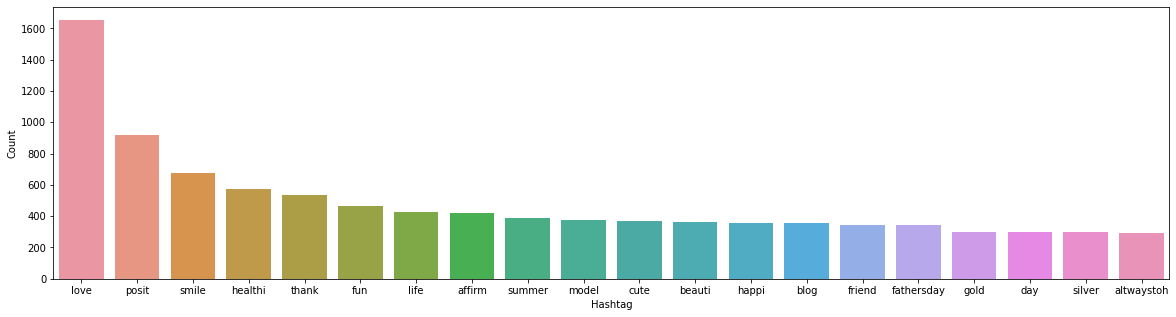

In [0]:

a= nltk.FreqDist(HT_regular)
d= pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
d=d.nlargest(columns="Count", n= 20)
plt.figure(figsize=(20,5))
ax=sns.barplot(data=d, x ="Hashtag", y="Count")
ax.set(ylabel="Count")
plt.show()

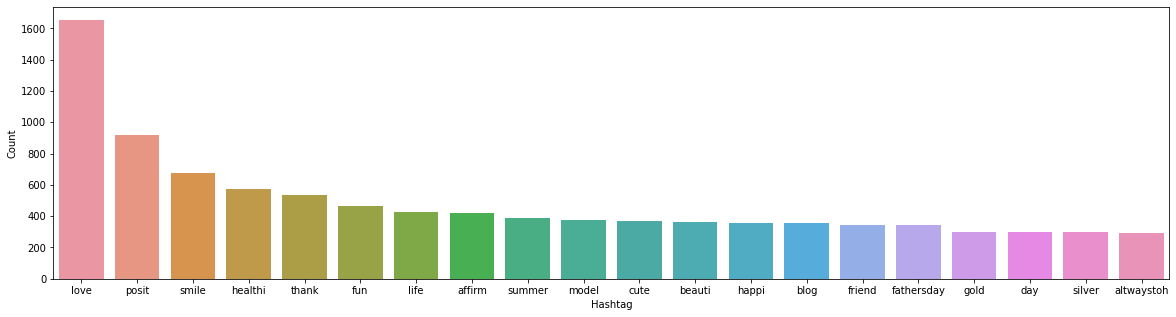

In [0]:
b= nltk.FreqDist(HT_negative)
e= pd.DataFrame({'Hashtag': list(b.keys()),'Count': list(b.values())})
e=e.nlargest(columns="Count", n= 20)
plt.figure(figsize=(20,5))
ax=sns.barplot(data=d, x ="Hashtag", y="Count")
ax.set(ylabel="Count")
plt.show()

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow= bow_vectorizer.fit_transform(combi['tidy_tweet1'])
bow.shape

(49159, 1000)

In [0]:
tfidf_vect= TfidfVectorizer(max_df=0.90 , min_df=2, max_features=1000, stop_words='english')
tfidf= tfidf_vect.fit_transform(combi['tidy_tweet1'])
tfidf.shape

(49159, 1000)

In [0]:
tokenized_tweet=combi['tidy_tweet1'].apply(lambda x: x.split())
model_w2v= gensim.models.Word2Vec(
            tokenized_tweet,
            size=200,
            window=5,
            min_count=2,
            sg=1,
            hs=0,
            negative=10,
            workers=2,
            seed=34)
model_w2v.wv.most_similar(positive="love")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('preciou', 0.7791342735290527),
 ('model', 0.7778657078742981),
 ('grant', 0.7720670700073242),
 ('surround', 0.7600946426391602),
 ('shower', 0.7585170865058899),
 ('breath', 0.7553199529647827),
 ('cuddl', 0.7518777251243591),
 ('#custom', 0.7496174573898315),
 ('pop', 0.7493038177490234),
 ('end', 0.7448121309280396)]

In [0]:
model_w2v['love']

array([-0.06086491,  0.00228229, -0.1620097 ,  0.00831083, -0.20210281,
       -0.02049095,  0.02243067, -0.04713552,  0.10593181,  0.20802079,
       -0.27001372, -0.13015297,  0.01818887,  0.14128049, -0.01516257,
        0.02647784, -0.1348393 ,  0.5012144 ,  0.14777325, -0.40059596,
       -0.11930759,  0.36113903,  0.22478038,  0.07914679, -0.14690006,
       -0.18837817,  0.21154338,  0.02149919, -0.19657329,  0.10776938,
        0.18856773,  0.12331747,  0.14254853, -0.13229837,  0.08036187,
       -0.05287068, -0.08424065,  0.01443873,  0.30585337, -0.14146852,
        0.06211489, -0.21096784,  0.23992099,  0.21686044, -0.2540035 ,
       -0.00258111,  0.22222926, -0.06763387, -0.09523363, -0.1871305 ,
        0.03848874, -0.06949458, -0.50141907, -0.1253619 , -0.34591997,
       -0.33068186, -0.25735435,  0.10898305, -0.46367174, -0.19367109,
       -0.389891  , -0.12464386,  0.01501152,  0.00771459, -0.47939265,
       -0.22348683,  0.33844206, -0.0266691 ,  0.26035625, -0.02

In [0]:
len(model_w2v['love'])

200

In [0]:
def word_vector(tokens,size):
  vec=np.zeros(size).reshape((1,size))
  count=0.
  for word in tokens:
    try:
      vec+= model_w2v[word].reshape((1,size))
      count+=1.
    except KeyError:
      if count !=0:
        vec/= count
      return vec

In [0]:
wordvec_arrays= np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:]= word_vector(tokenized_tweet[i],200)
  wordvec_df=pd.DataFrame(wordvec_arrays)

wordvec_df.shape

(49159, 200)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [0]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid= train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)
lreg=LogisticRegression()


In [0]:
#lreg.fit(xtrain_bow,ytrain)
#prediction= lreg.predict_proba(test_bow)
#test_pred_int= test_pred[:,1]>=0.3
#test_pred_int= test_pred_int.astype(np.int)
#test['label']= test_pred_int
#submission=test[['id','label']]
#submission.to_csv('sub.csv', index=False)

In [0]:
import math
wordvec_df.head()
wordvec_df.isnull()
wordvec_df.fillna(method='bfill')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.107357,0.046577,-0.210594,-0.025821,-0.120493,-0.052190,-0.027791,0.046747,0.143555,0.014346,0.021431,0.092860,0.070236,0.208834,-0.034347,0.031061,0.169234,0.336825,0.033232,-0.198125,0.039943,0.351687,0.057629,-0.175995,-0.031781,-0.118368,0.031080,0.249222,-0.055299,-0.261277,-0.094195,0.187464,0.191322,-0.147198,0.133896,0.077069,0.116103,0.087792,-0.022143,-0.023310,...,-0.038045,0.073695,0.024968,0.048527,-0.076394,0.154252,0.227334,-0.039809,-0.056940,0.215469,0.171193,-0.270122,-0.049136,-0.102961,0.168747,-0.005593,0.018216,-0.049547,0.129428,-0.168216,-0.086501,-0.080377,0.031069,-0.029999,-0.091996,-0.000435,-0.191437,0.117065,-0.086046,-0.024862,-0.198212,0.133523,-0.003284,-0.152134,-0.014187,-0.082668,0.221798,-0.225586,0.100206,-0.227505
1,-0.107357,0.046577,-0.210594,-0.025821,-0.120493,-0.052190,-0.027791,0.046747,0.143555,0.014346,0.021431,0.092860,0.070236,0.208834,-0.034347,0.031061,0.169234,0.336825,0.033232,-0.198125,0.039943,0.351687,0.057629,-0.175995,-0.031781,-0.118368,0.031080,0.249222,-0.055299,-0.261277,-0.094195,0.187464,0.191322,-0.147198,0.133896,0.077069,0.116103,0.087792,-0.022143,-0.023310,...,-0.038045,0.073695,0.024968,0.048527,-0.076394,0.154252,0.227334,-0.039809,-0.056940,0.215469,0.171193,-0.270122,-0.049136,-0.102961,0.168747,-0.005593,0.018216,-0.049547,0.129428,-0.168216,-0.086501,-0.080377,0.031069,-0.029999,-0.091996,-0.000435,-0.191437,0.117065,-0.086046,-0.024862,-0.198212,0.133523,-0.003284,-0.152134,-0.014187,-0.082668,0.221798,-0.225586,0.100206,-0.227505
2,-0.106365,0.095475,-0.292947,0.024775,-0.077149,-0.119307,-0.078733,0.126254,0.259949,0.098970,-0.060547,0.122855,0.143841,0.290233,-0.132900,0.022920,0.209875,0.408401,0.035180,-0.288281,0.061346,0.361160,0.045040,-0.086935,0.000553,-0.175629,0.105625,0.251407,-0.104890,-0.339319,-0.110187,0.276579,0.157711,-0.224488,0.009232,0.054980,0.118125,0.126339,-0.066844,-0.081250,...,-0.044710,0.021606,0.026275,0.058259,-0.089596,0.222694,0.307516,-0.002498,-0.057834,0.234150,0.247168,-0.335058,-0.018928,-0.184048,0.182580,0.007613,0.017761,-0.032850,0.148514,-0.189910,-0.034994,-0.166540,0.068663,-0.069461,-0.032613,0.058367,-0.221955,0.146215,-0.132556,0.018007,-0.182637,0.101163,0.039989,-0.260445,-0.063605,-0.122487,0.253027,-0.304811,0.127411,-0.191436
3,-0.106365,0.095475,-0.292947,0.024775,-0.077149,-0.119307,-0.078733,0.126254,0.259949,0.098970,-0.060547,0.122855,0.143841,0.290233,-0.132900,0.022920,0.209875,0.408401,0.035180,-0.288281,0.061346,0.361160,0.045040,-0.086935,0.000553,-0.175629,0.105625,0.251407,-0.104890,-0.339319,-0.110187,0.276579,0.157711,-0.224488,0.009232,0.054980,0.118125,0.126339,-0.066844,-0.081250,...,-0.044710,0.021606,0.026275,0.058259,-0.089596,0.222694,0.307516,-0.002498,-0.057834,0.234150,0.247168,-0.335058,-0.018928,-0.184048,0.182580,0.007613,0.017761,-0.032850,0.148514,-0.189910,-0.034994,-0.166540,0.068663,-0.069461,-0.032613,0.058367,-0.221955,0.146215,-0.132556,0.018007,-0.182637,0.101163,0.039989,-0.260445,-0.063605,-0.122487,0.253027,-0.304811,0.127411,-0.191436
4,-0.106365,0.095475,-0.292947,0.024775,-0.077149,-0.119307,-0.078733,0.126254,0.259949,0.098970,-0.060547,0.122855,0.143841,0.290233,-0.132900,0.022920,0.209875,0.408401,0.035180,-0.288281,0.061346,0.361160,0.045040,-0.086935,0.000553,-0.175629,0.105625,0.251407,-0.104890,-0.339319,-0.110187,0.276579,0.157711,-0.224488,0.009232,0.054980,0.118125,0.126339,-0.066844,-0.081250,...,-0.044710,0.021606,0.026275,0.058259,-0.089596,0.222694,0.307516,-0.002498,-0.057834,0.234150,0.247168,-0.335058,-0.018928,-0.184048,0.182580,0.007613,0.017761,-0.032850,0.148514,-0.189910,-0.034994,-0.166540,0.068663,-0.069461,-0.032613,0.058367,-0.221955,0.146215,-0.132556,0.018

In [0]:
train_tfidf= tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf= train_tfidf[yvalid.index]
#train_tfidf=np.ceil(train_tfidf)
lreg.fit(xtrain_tfidf,ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5451327433628319

In [0]:
print(test_tfidf)

  (0, 625)	1.0
  (1, 568)	0.4832519150005041
  (1, 279)	0.4249740234497036
  (1, 82)	0.5211685004365159
  (1, 969)	0.43520553961616154
  (1, 950)	0.3533329852723565
  (2, 956)	0.4252779413953032
  (2, 741)	0.4080192555234782
  (2, 402)	0.2850663758045319
  (2, 25)	0.3262794326290019
  (2, 400)	0.6818635148720055
  (3, 304)	0.5282979829455672
  (3, 140)	0.5271716096891691
  (3, 24)	0.4951900717188626
  (3, 97)	0.44472252925216577
  (4, 556)	0.58092961184308
  (4, 27)	0.5605690274472755
  (4, 518)	0.3386521515189278
  (4, 79)	0.4833196373232367
  (5, 145)	1.0
  (6, 583)	0.4124572006012043
  (6, 439)	0.39223243416828363
  (6, 890)	0.3642444339496192
  (6, 289)	0.38729564279361367
  (6, 228)	0.3634868179866083
  :	:
  (17192, 728)	0.293909942896328
  (17193, 246)	0.6332778044821932
  (17193, 961)	0.532509130693973
  (17193, 307)	0.412937926376108
  (17193, 498)	0.38062516605968433
  (17194, 122)	0.3818217223390089
  (17194, 411)	0.37375293461862846
  (17194, 929)	0.30556509026170586
  (171

In [0]:
train_w2v = wordvec_df.iloc[:49158,:]
test_w2v = wordvec_df.iloc[49158:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:1]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
#lreg.fit(xtrain_w2v, ytrain)
#prediction = lreg.predict_proba(xvalid_w2v)
#prediction_int = prediction[:,1] >= 0.3
#prediction_int = prediction_int.astype(np.int)
#f1_score(yvalid, prediction_int)


In [0]:
from sklearn import svm
svc=svm.SVC(kernel='linear', C=1, probability = True).fit(xtrain_tfidf, ytrain)
prediction1=svc.predict_proba(xvalid_tfidf)
prediction_int1=prediction1[:,1]>=0.3
prediction_int1=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int1)

0.5451327433628319

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators= 400, random_state=11).fit(xtrain_tfidf,ytrain)
prediction2=rf.predict(xvalid_tfidf)
f1_score(yvalid,prediction2)

0.562152133580705

In [0]:
from xgboost import XGBClassifier
xbg= XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_tfidf,ytrain)
prediction3=xbg.predict(xvalid_tfidf)
f1_score(yvalid,prediction3)

0.5185891325071497